# 1.4 Supervised Learning Algorithms Part 1 ANN

## 1. Import libraries and load data
## 2. Data Wrangling
## 3. Run artificial neural network algorithm
## 4. Create confusion matrix

### 1. Import libraries and load data

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import graphviz
from sklearn import datasets
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from matplotlib.pyplot import figure

In [7]:
#Create a path to where your data is stored.
path = r'C:\Users\User\250216_ClimateWins Analysis\Data Sets'

In [8]:
#Read in the European weather data.
climate = pd.read_csv(os.path.join(path, 'Original Data', 'Dataset-weather-prediction-dataset-processed.csv'))

In [9]:
climate.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,2.1,0.85,1.018,0.32,0.09,0,0.7,...,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,19600102,1,6,2.1,0.84,1.018,0.36,1.05,0,1.1,...,7,0.91,1.0007,0.25,0.84,0,0.7,8.9,5.6,12.1
2,19600103,1,8,2.1,0.90,1.018,0.18,0.30,0,0.0,...,7,0.91,1.0096,0.17,0.08,0,0.1,10.5,8.1,12.9
3,19600104,1,3,2.1,0.92,1.018,0.58,0.00,0,4.1,...,7,0.86,1.0184,0.13,0.98,0,0.0,7.4,7.3,10.6
4,19600105,1,6,2.1,0.95,1.018,0.65,0.14,0,5.4,...,3,0.80,1.0328,0.46,0.00,0,5.7,5.7,3.0,8.4


In [10]:
# Import the pleasant weather data
pwdf = pd.read_csv(os.path.join(path, 'Original Data', 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))
pwdf

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22946,20221028,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22947,20221029,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22948,20221030,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### 2. Data Wrangling

In [12]:
df_wrangled=climate.drop(columns=['GDANSK_cloud_cover',
                                       'GDANSK_humidity',
                                       'GDANSK_precipitation',
                                       'GDANSK_snow_depth',
                                       'GDANSK_temp_mean',
                                       'GDANSK_temp_min',
                                       'GDANSK_temp_max',
                                       'ROMA_cloud_cover',
                                       'ROMA_wind_speed',
                                       'ROMA_humidity',
                                       'ROMA_pressure',
                                       'ROMA_sunshine',
                                       'ROMA_temp_mean',
                                       'TOURS_wind_speed',
                                       'TOURS_humidity',
                                       'TOURS_pressure',
                                       'TOURS_global_radiation',
                                       'TOURS_precipitation',
                                       'TOURS_temp_mean',
                                       'TOURS_temp_min',
                                       'TOURS_temp_max'])

In [13]:
#Create an 'X' matrix by dropping the unneeded columns.
X = df_wrangled.drop(['DATE', 'MONTH'], axis=1)
y = pwdf.drop(['DATE'], axis=1)

In [14]:
#Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [15]:
#viewing shape of training and test sets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 147)
(5738, 147)
(17212, 15)
(5738, 15)


In [16]:
X_train[:10]

,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
8196,2,2.1,0.69,1.0131,2.45,0.06,0,6.9,20.4,13.6,...,6,0.83,1.0082,1.13,0.28,0,2.1,15.6,13.7,17.6
20472,8,1.7,0.82,1.0166,0.58,0.09,0,0.0,-1.8,-3.2,...,5,0.82,1.0142,0.23,0.41,0,3.4,10.7,7.9,13.5
18269,7,1.5,0.84,1.0097,0.41,0.07,2,0.6,-1.8,-6.0,...,5,0.90,1.0186,0.43,0.03,0,3.2,1.0,-3.9,5.9
7713,2,2.1,0.74,1.0207,0.80,0.00,0,3.5,-1.4,-3.8,...,8,0.91,1.0032,0.19,1.58,0,0.0,6.8,5.5,9.6
21958,7,4.4,0.69,1.0135,0.58,1.18,0,0.5,6.1,1.8,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
11464,7,1.4,0.64,1.0301,2.82,0.00,0,10.1,18.3,10.6,...,4,0.89,1.0378,3.10,0.00,0,12.5,13.1,9.0,16.9
3984,3,2.1,0.80,1.0180,0.59,0.00,0,3.6,3.7,-0.5,...,6,0.90,1.0014,0.43,0.03,0,3.2,10.9,9.3,12.5
4752,8,2.1,0.94,1.0180,0.18,0.00,0,0.0,-3.9,-7.4,...,8,0.96,1.0336,0.13,0.00,0,0.0,10.5,9.7,11.4
11092,7,2.1,0.83,1.0190,1.97,0.50,0,5.5,15.7,11.2,...,7,0.89,1.0032,1.87,0.77,0,3.4,12.6,9.5,15.8
21377,2,1.3,0.61,1.0174,1.34,0.00,0,13.5,18.8,9.9,...,5,0.82,1.0142,2.64,0.41,0,3.4,10.7,7.9,13.5


In [88]:
# Train ANN on unscaled data
mlp_unscaled = MLPClassifier(hidden_layer_sizes=(20, 10, 5), max_iter=500, random_state=42)
mlp_unscaled.fit(X_train, y_train)

# Make predictions
y_pred_train_unscaled = mlp_unscaled.predict(X_train)
y_pred_test_unscaled = mlp_unscaled.predict(X_test)

# Calculate accuracy
train_acc_unscaled = accuracy_score(y_train, y_pred_train_unscaled)
test_acc_unscaled = accuracy_score(y_test, y_pred_test_unscaled)

print("🔴 Unscaled Data → Training Accuracy:", train_acc_unscaled)
print("🔴 Unscaled Data → Test Accuracy:", test_acc_unscaled)


🔴 Unscaled Data → Training Accuracy: 0.49837322798047873
🔴 Unscaled Data → Test Accuracy: 0.4923318229348205


In [90]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
#Scaling the data
scaler = StandardScaler()
scaler.fit(X_train)

#Scaling the X data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [92]:
#Assign the scaled data to DataFrames
X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)

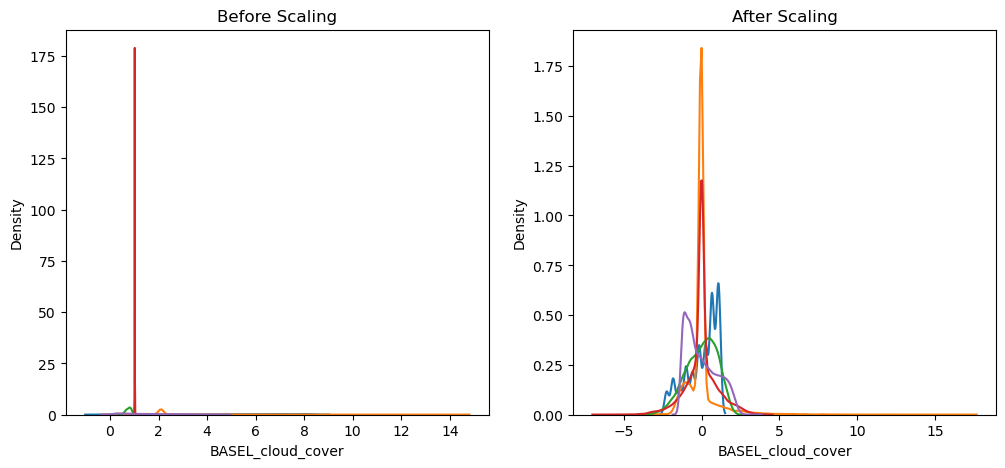

In [94]:
# Define selected features for visualization (adjust as needed)
selected_features = X.columns[:5]  # Selecting the first 5 numerical features

# Plot the distributions before and after scaling
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.set_title("Before Scaling")
for feature in selected_features:
    sns.kdeplot(X_train_df[feature], ax=ax1)

ax2.set_title("After Scaling")
for feature in selected_features:
    sns.kdeplot(X_train_scaled_df[feature], ax=ax2)  # FIXED HERE

plt.show()


In [106]:
# Train ANN on scaled data
mlp_scaled = MLPClassifier(hidden_layer_sizes=(20, 10, 5), max_iter=500, tol=0.0001, random_state=42)
mlp_scaled.fit(X_train_scaled_df, y_train)  # Use scaled DataFrame

# Make predictions
y_pred_train_scaled = mlp_scaled.predict(X_train_scaled)
y_pred_test_scaled = mlp_scaled.predict(X_test_scaled)

# Calculate accuracy
train_acc_scaled = accuracy_score(y_train, y_pred_train_scaled)
test_acc_scaled = accuracy_score(y_test, y_pred_test_scaled)

print("🟢 Scaled Data → Training Accuracy:", train_acc_scaled)
print("🟢 Scaled Data → Test Accuracy:", test_acc_scaled)

🟢 Scaled Data → Training Accuracy: 0.5427027655124332
🟢 Scaled Data → Test Accuracy: 0.5294527710003486


C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


Training confusion matrix saved at: C:\Users\User\250216_ClimateWins Analysis\Visualisations\conf_mat_trainANN1.png


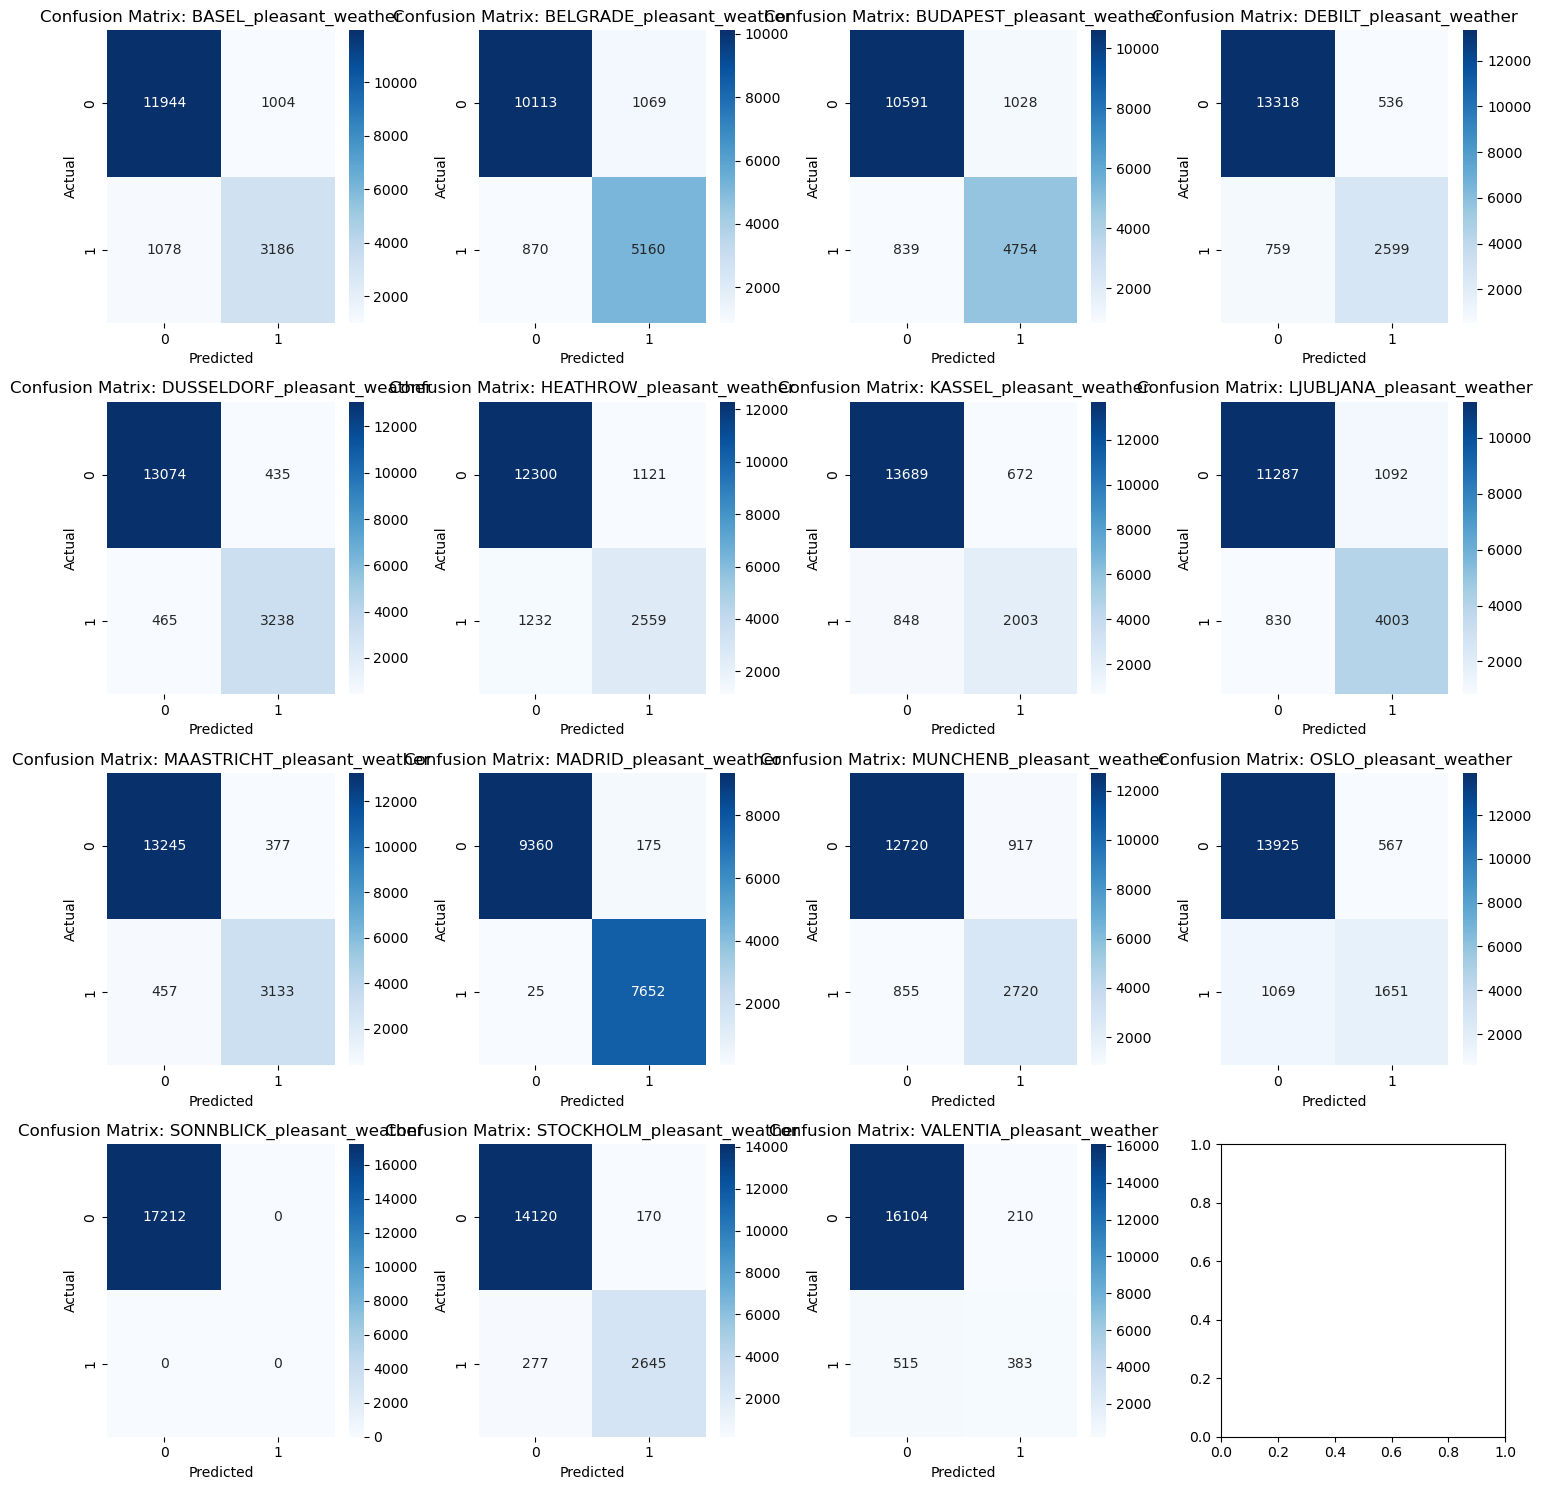

In [131]:
# Compute confusion matrix for training data each weather station
cm_matrices = multilabel_confusion_matrix(y_train, y_pred_train_scaled)

# Get station names for labeling
station_labels = y_train.columns

# Plot multiple confusion matrices in a grid
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))  # Adjust grid based on number of stations
axes = axes.ravel()  # Flatten axes array

for i, (cm, label) in enumerate(zip(cm_matrices, station_labels)):
    sns.heatmap(cm, annot=True, fmt='g', cmap="Blues", ax=axes[i])
    axes[i].set_title(f'Confusion Matrix: {label}')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')

# **Define the save path for training confusion matrix**
save_path_train = os.path.join(r"C:\Users\User\250216_ClimateWins Analysis", "Visualisations", "conf_mat_trainANN1.png")

# **Ensure the "Visualisations" folder exists**
os.makedirs(os.path.dirname(save_path_train), exist_ok=True)

# **Save the plot**
plt.savefig(save_path_train, dpi=300, bbox_inches='tight')

print(f"Training confusion matrix saved at: {save_path_train}")

plt.tight_layout()
plt.show()

Training confusion matrix saved at: C:\Users\User\250216_ClimateWins Analysis\Visualisations\conf_mat_testANN1.png


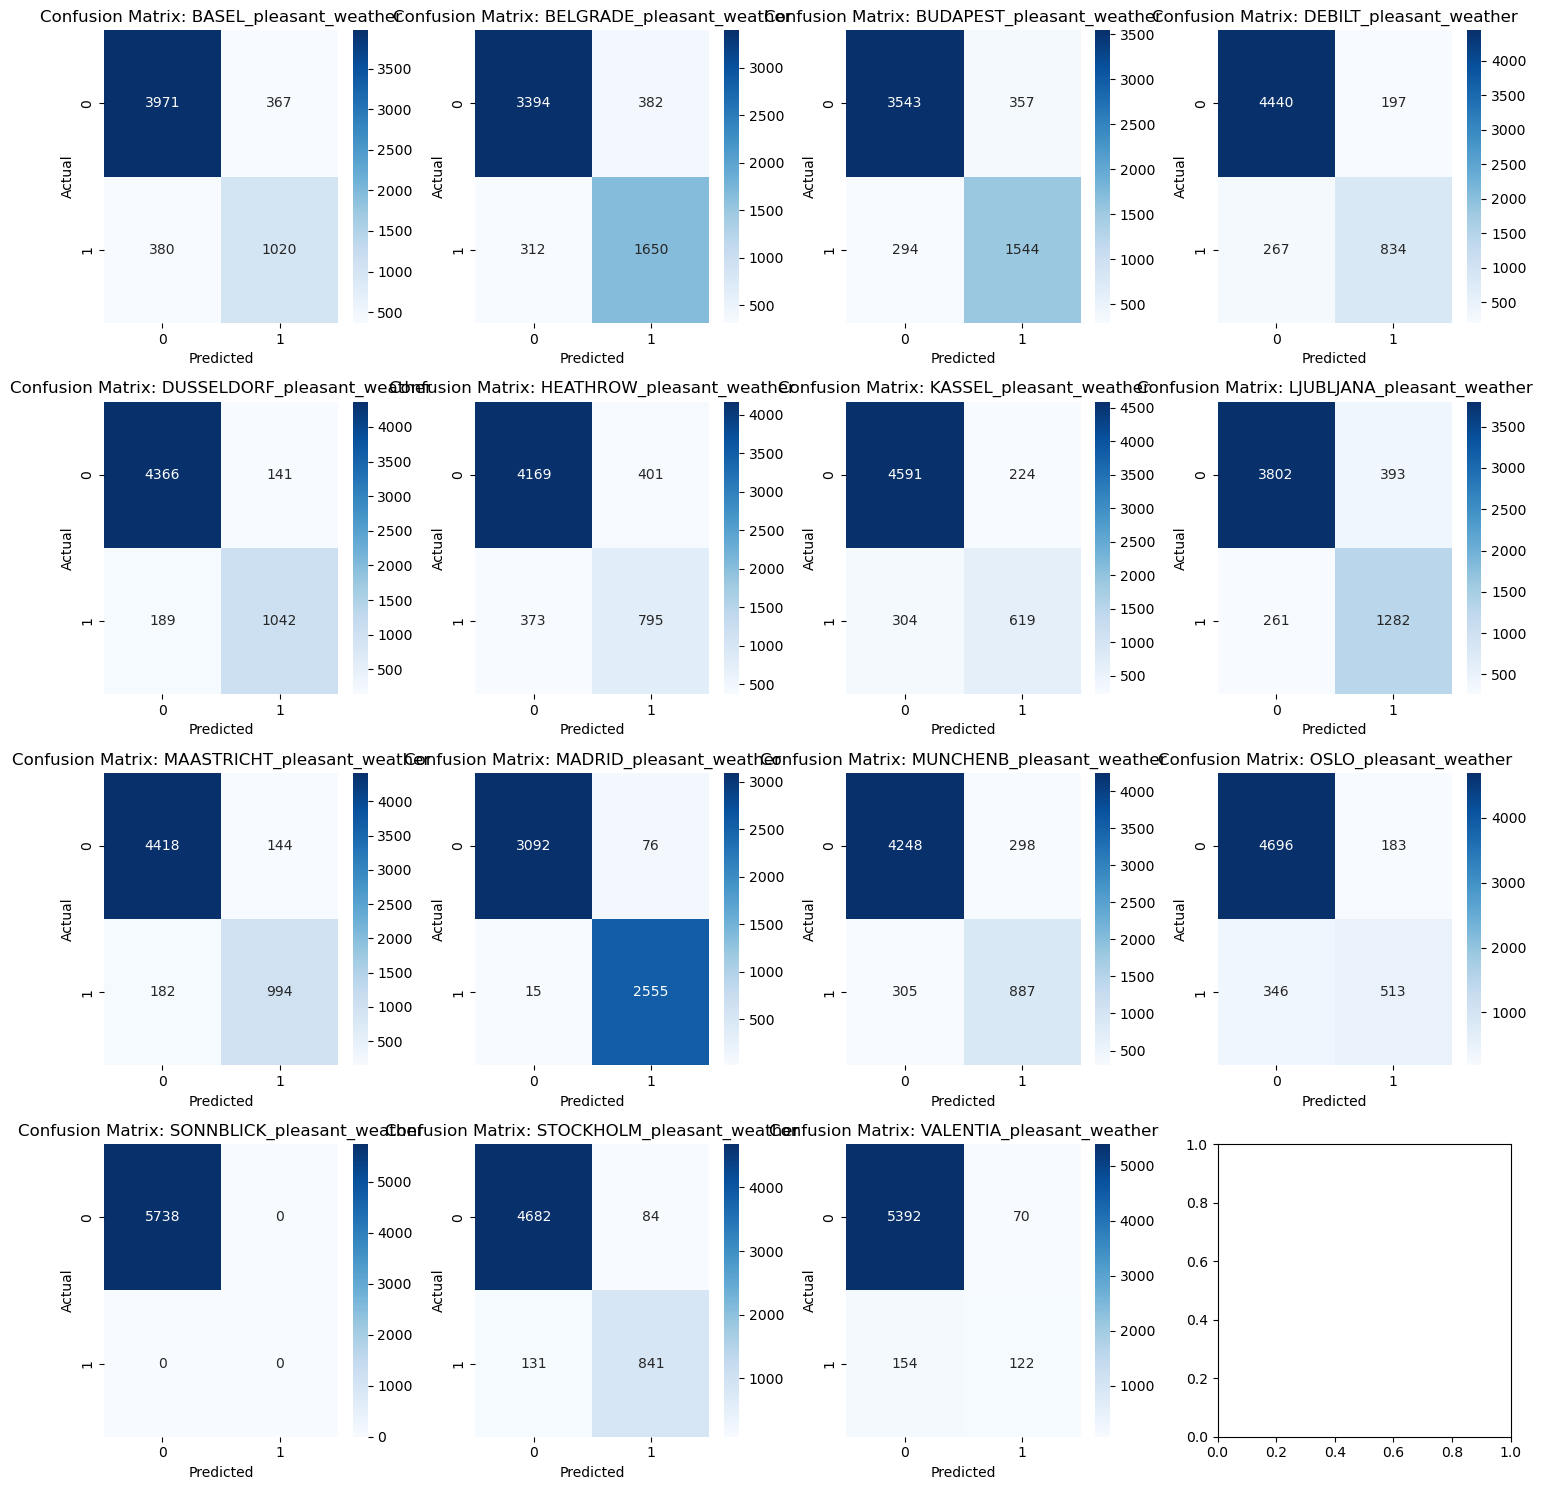

In [133]:
# Compute confusion matrix for test data for each weather station
cm_matrices = multilabel_confusion_matrix(y_test, y_pred_test_scaled)

# Get station names for labeling
station_labels = y_test.columns

# Plot multiple confusion matrices in a grid
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))  # Adjust grid based on number of stations
axes = axes.ravel()  # Flatten axes array

for i, (cm, label) in enumerate(zip(cm_matrices, station_labels)):
    sns.heatmap(cm, annot=True, fmt='g', cmap="Blues", ax=axes[i])
    axes[i].set_title(f'Confusion Matrix: {label}')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')

# **Define the save path for training confusion matrix**
save_path_train = os.path.join(r"C:\Users\User\250216_ClimateWins Analysis", "Visualisations", "conf_mat_testANN1.png")

# **Ensure the "Visualisations" folder exists**
os.makedirs(os.path.dirname(save_path_train), exist_ok=True)

# **Save the plot**
plt.savefig(save_path_train, dpi=300, bbox_inches='tight')

print(f"Training confusion matrix saved at: {save_path_train}")

plt.tight_layout()
plt.show()

#### The model is not yet very accurate, let's try a more iterations.

In [112]:
# Train ANN on scaled data with more iterations
mlp_scaled = MLPClassifier(hidden_layer_sizes=(20, 10, 5), max_iter=1000, tol=0.0001, random_state=42)
mlp_scaled.fit(X_train_scaled_df, y_train)  # Use scaled DataFrame

# Make predictions
y_pred_train_scaled = mlp_scaled.predict(X_train_scaled)
y_pred_test_scaled = mlp_scaled.predict(X_test_scaled)

# Calculate accuracy
train_acc_scaled = accuracy_score(y_train, y_pred_train_scaled)
test_acc_scaled = accuracy_score(y_test, y_pred_test_scaled)

print("🟢 Scaled Data → Training Accuracy:", train_acc_scaled)
print("🟢 Scaled Data → Test Accuracy:", test_acc_scaled)

🟢 Scaled Data → Training Accuracy: 0.5427027655124332
🟢 Scaled Data → Test Accuracy: 0.5294527710003486


C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


Training confusion matrix saved at: C:\Users\User\250216_ClimateWins Analysis\Visualisations\conf_mat_trainANN2.png


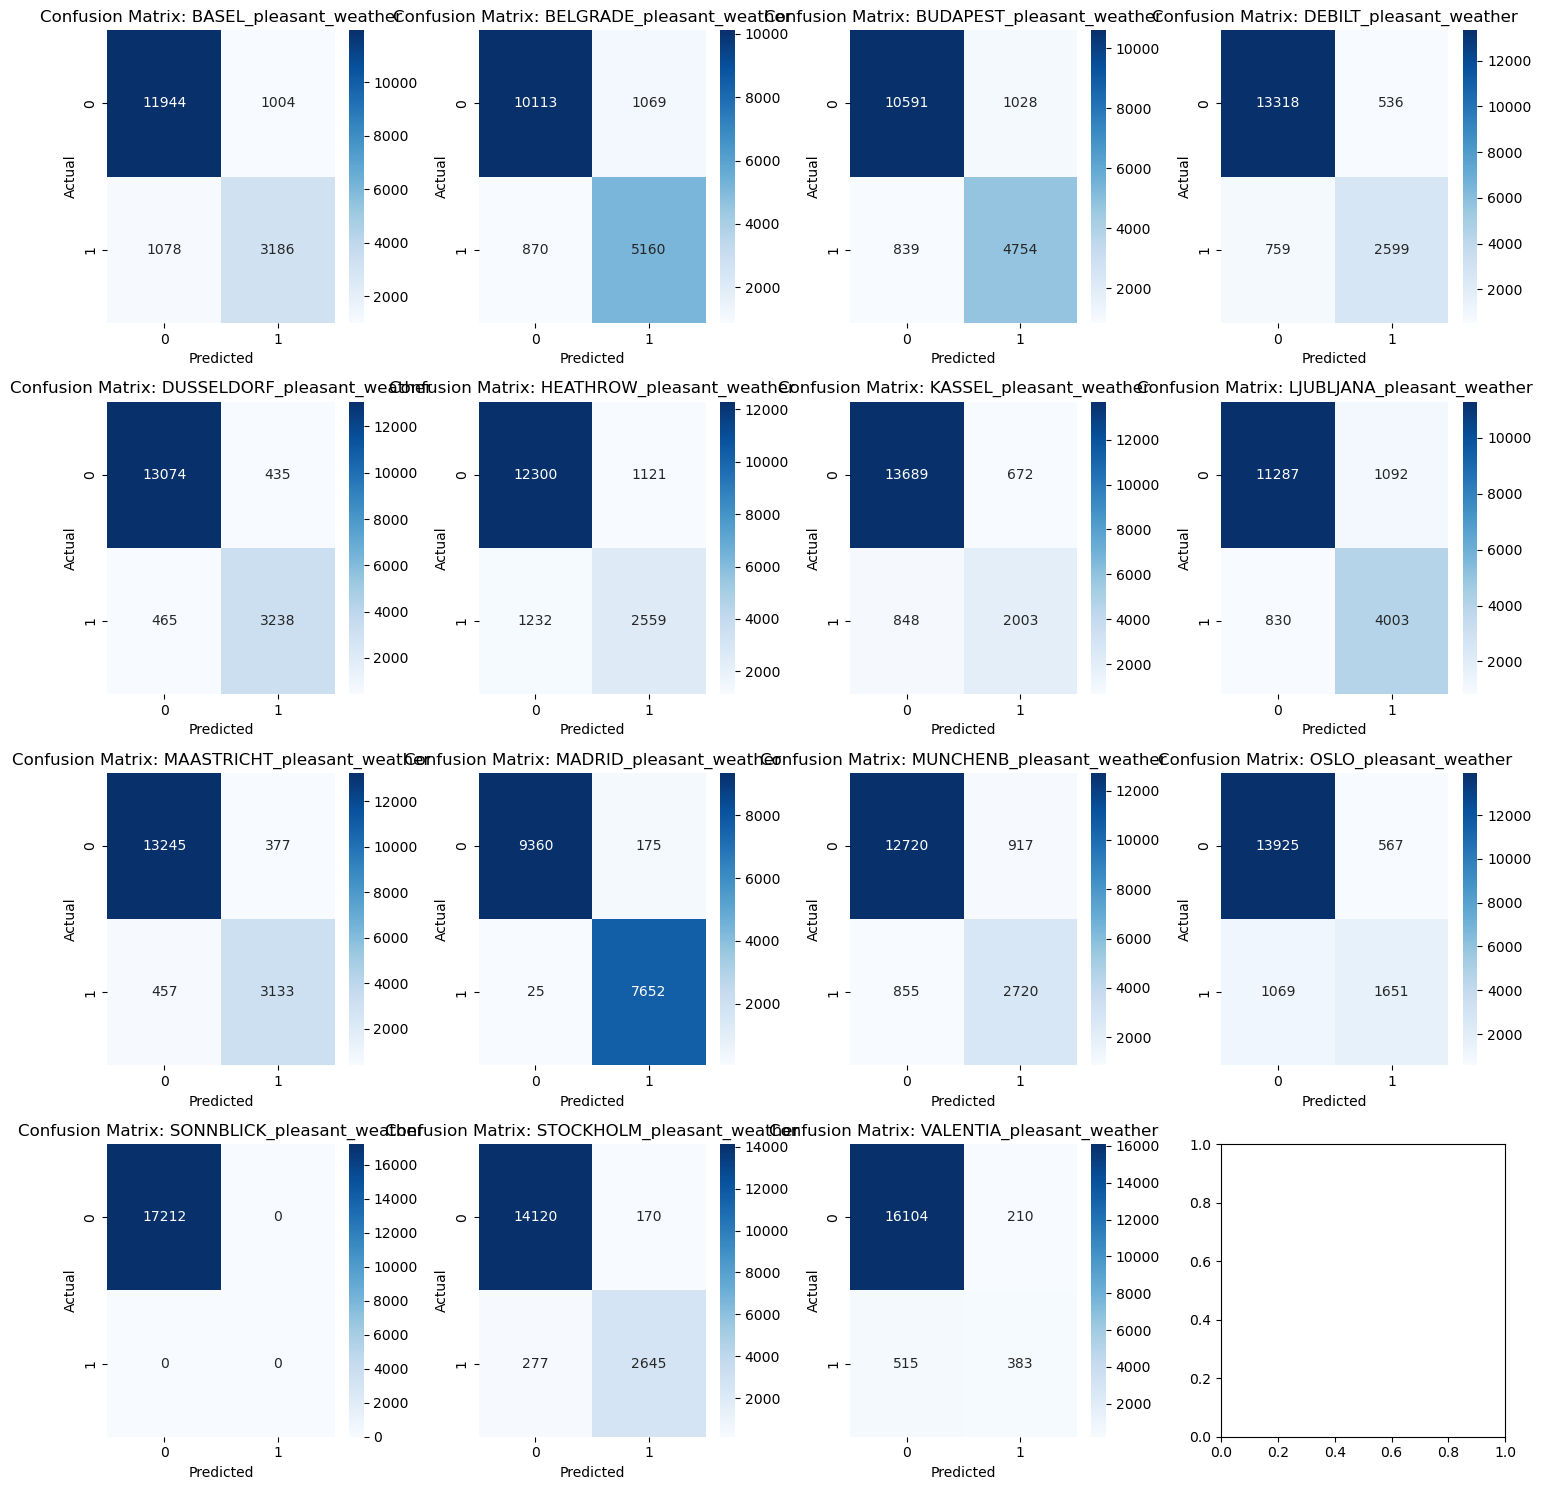

In [135]:
# Compute confusion matrix for training data each weather station
cm_matrices = multilabel_confusion_matrix(y_train, y_pred_train_scaled)

# Get station names for labeling
station_labels = y_train.columns

# Plot multiple confusion matrices in a grid
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))  # Adjust grid based on number of stations
axes = axes.ravel()  # Flatten axes array

for i, (cm, label) in enumerate(zip(cm_matrices, station_labels)):
    sns.heatmap(cm, annot=True, fmt='g', cmap="Blues", ax=axes[i])
    axes[i].set_title(f'Confusion Matrix: {label}')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')

# **Define the save path for training confusion matrix**
save_path_train = os.path.join(r"C:\Users\User\250216_ClimateWins Analysis", "Visualisations", "conf_mat_trainANN2.png")

# **Ensure the "Visualisations" folder exists**
os.makedirs(os.path.dirname(save_path_train), exist_ok=True)

# **Save the plot**
plt.savefig(save_path_train, dpi=300, bbox_inches='tight')

print(f"Training confusion matrix saved at: {save_path_train}")

plt.tight_layout()
plt.show()

Training confusion matrix saved at: C:\Users\User\250216_ClimateWins Analysis\Visualisations\conf_mat_testANN2.png


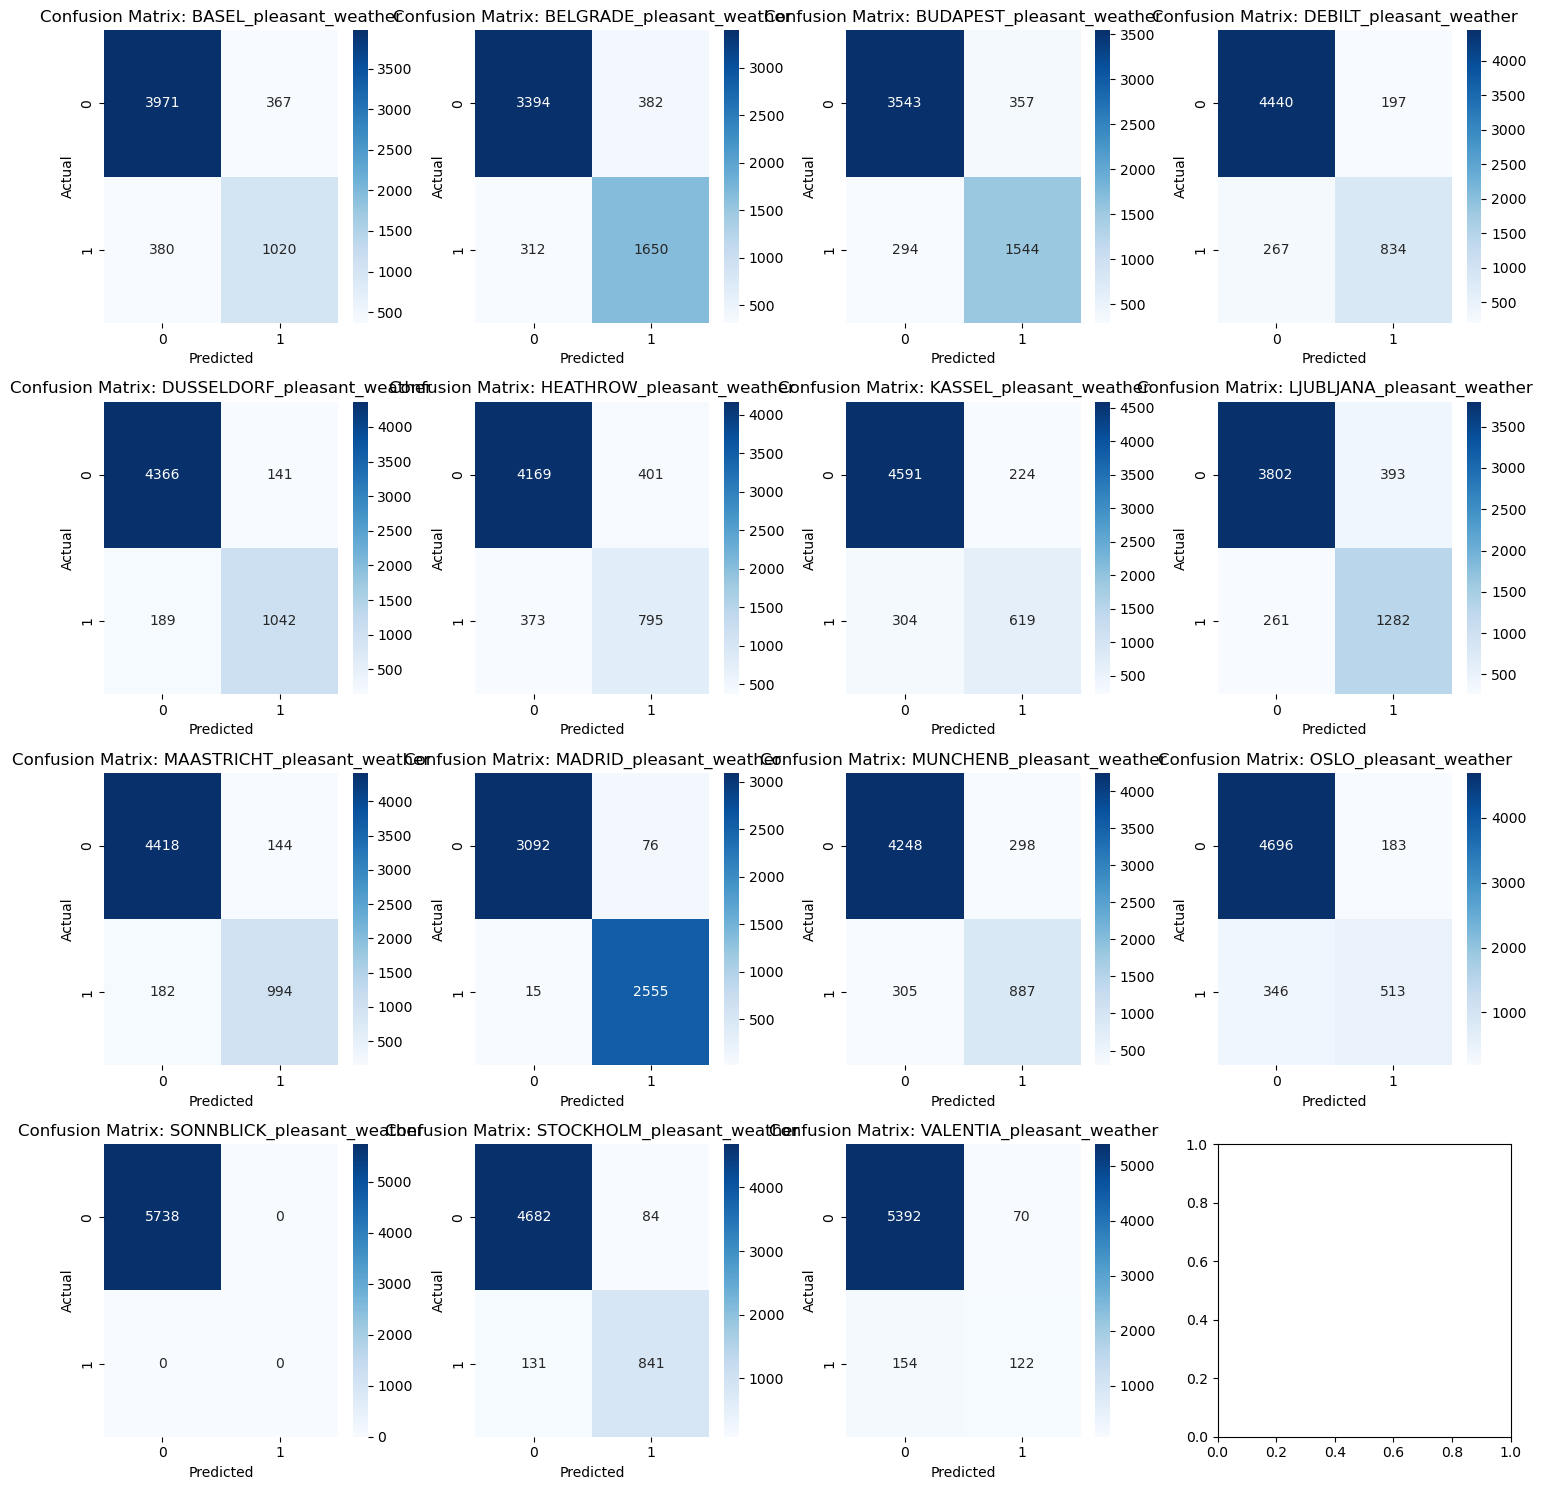

In [139]:
# Compute confusion matrix for test data for each weather station
cm_matrices = multilabel_confusion_matrix(y_test, y_pred_test_scaled)

# Get station names for labeling
station_labels = y_test.columns

# Plot multiple confusion matrices in a grid
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))  # Adjust grid based on number of stations
axes = axes.ravel()  # Flatten axes array

for i, (cm, label) in enumerate(zip(cm_matrices, station_labels)):
    sns.heatmap(cm, annot=True, fmt='g', cmap="Blues", ax=axes[i])
    axes[i].set_title(f'Confusion Matrix: {label}')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')

# **Define the save path for training confusion matrix**
save_path_train = os.path.join(r"C:\Users\User\250216_ClimateWins Analysis", "Visualisations", "conf_mat_testANN2.png")

# **Ensure the "Visualisations" folder exists**
os.makedirs(os.path.dirname(save_path_train), exist_ok=True)

# **Save the plot**
plt.savefig(save_path_train, dpi=300, bbox_inches='tight')

print(f"Training confusion matrix saved at: {save_path_train}")

plt.tight_layout()
plt.show()

#### Accuracy is not improving try a less complex network

In [121]:
# Train ANN on scaled data with more iterations
mlp_scaled = MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=1000, tol=0.0001, random_state=42)
mlp_scaled.fit(X_train_scaled_df, y_train)  # Use scaled DataFrame

# Make predictions
y_pred_train_scaled = mlp_scaled.predict(X_train_scaled)
y_pred_test_scaled = mlp_scaled.predict(X_test_scaled)

# Calculate accuracy
train_acc_scaled = accuracy_score(y_train, y_pred_train_scaled)
test_acc_scaled = accuracy_score(y_test, y_pred_test_scaled)

print("🟢 Scaled Data → Training Accuracy:", train_acc_scaled)
print("🟢 Scaled Data → Test Accuracy:", test_acc_scaled)

🟢 Scaled Data → Training Accuracy: 0.5208575412502905
🟢 Scaled Data → Test Accuracy: 0.520738933426281


C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


Training confusion matrix saved at: C:\Users\User\250216_ClimateWins Analysis\Visualisations\conf_mat_trainANN3.png


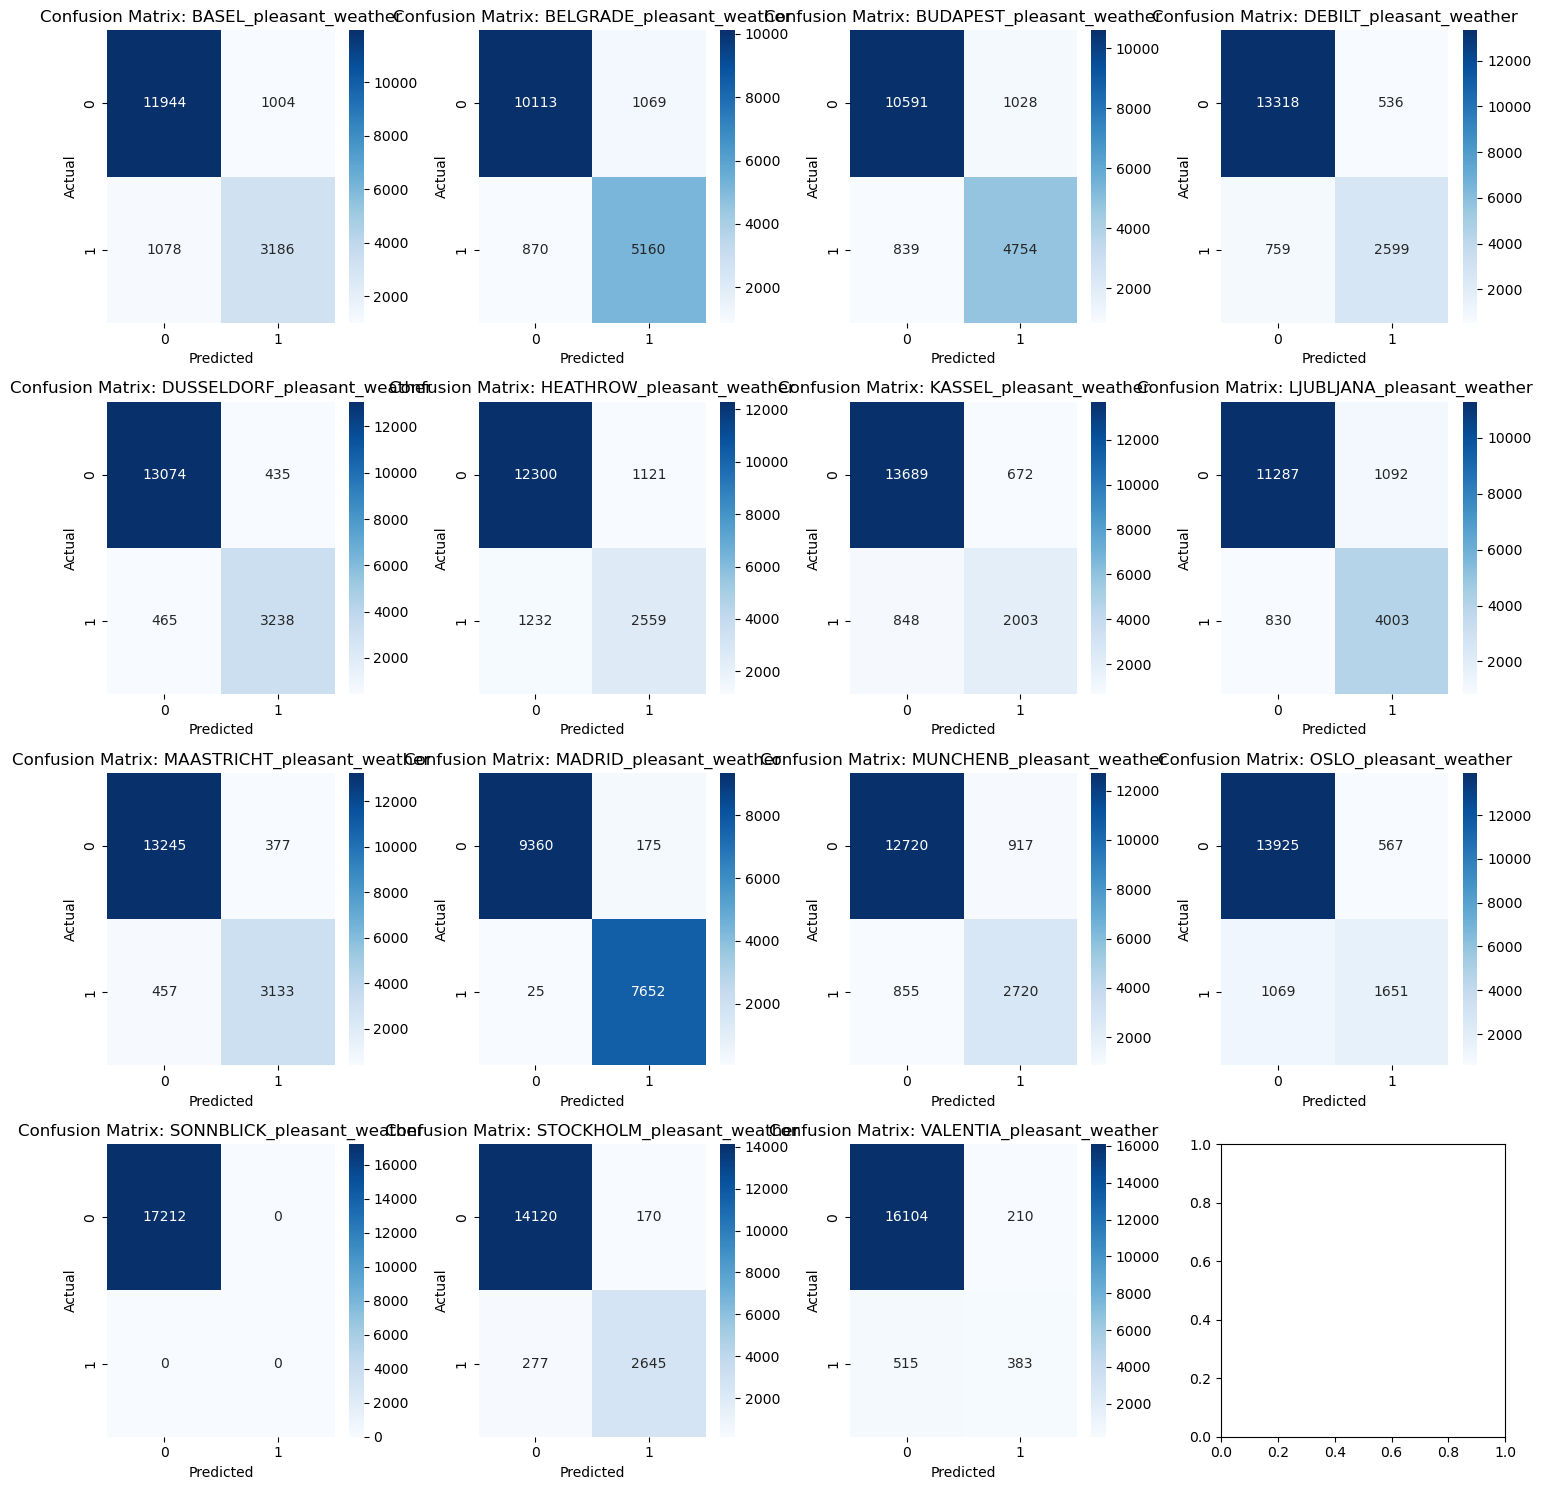

In [137]:
# Compute confusion matrix for training data each weather station
cm_matrices = multilabel_confusion_matrix(y_train, y_pred_train_scaled)

# Get station names for labeling
station_labels = y_train.columns

# Plot multiple confusion matrices in a grid
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))  # Adjust grid based on number of stations
axes = axes.ravel()  # Flatten axes array

for i, (cm, label) in enumerate(zip(cm_matrices, station_labels)):
    sns.heatmap(cm, annot=True, fmt='g', cmap="Blues", ax=axes[i])
    axes[i].set_title(f'Confusion Matrix: {label}')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')

# **Define the save path for training confusion matrix**
save_path_train = os.path.join(r"C:\Users\User\250216_ClimateWins Analysis", "Visualisations", "conf_mat_trainANN3.png")

# **Ensure the "Visualisations" folder exists**
os.makedirs(os.path.dirname(save_path_train), exist_ok=True)

# **Save the plot**
plt.savefig(save_path_train, dpi=300, bbox_inches='tight')

print(f"Training confusion matrix saved at: {save_path_train}")

plt.tight_layout()
plt.show()

Training confusion matrix saved at: C:\Users\User\250216_ClimateWins Analysis\Visualisations\conf_mat_testANN3.png


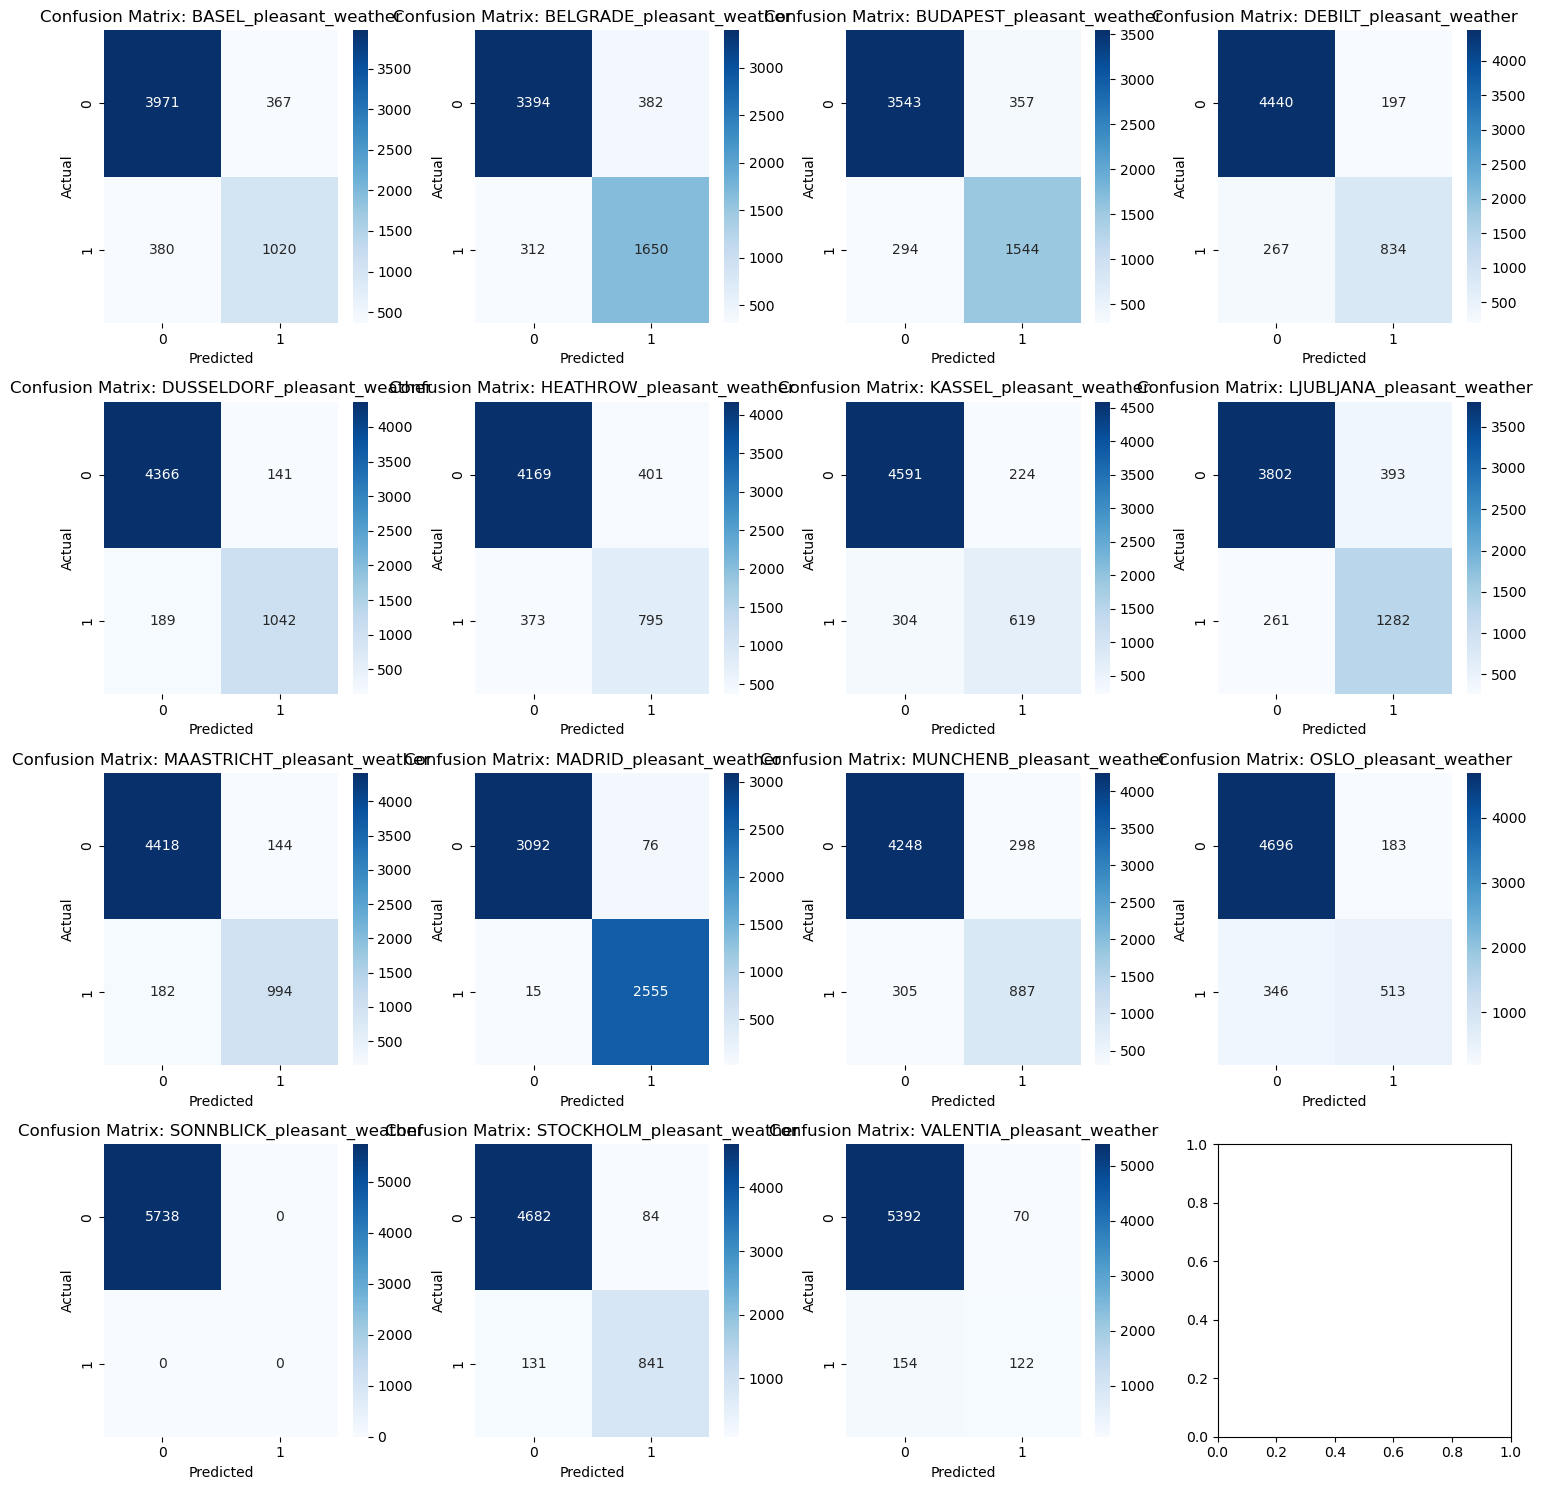

In [141]:
# Compute confusion matrix for test data for each weather station
cm_matrices = multilabel_confusion_matrix(y_test, y_pred_test_scaled)

# Get station names for labeling
station_labels = y_test.columns

# Plot multiple confusion matrices in a grid
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))  # Adjust grid based on number of stations
axes = axes.ravel()  # Flatten axes array

for i, (cm, label) in enumerate(zip(cm_matrices, station_labels)):
    sns.heatmap(cm, annot=True, fmt='g', cmap="Blues", ax=axes[i])
    axes[i].set_title(f'Confusion Matrix: {label}')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')

# **Define the save path for training confusion matrix**
save_path_train = os.path.join(r"C:\Users\User\250216_ClimateWins Analysis", "Visualisations", "conf_mat_testANN3.png")

# **Ensure the "Visualisations" folder exists**
os.makedirs(os.path.dirname(save_path_train), exist_ok=True)

# **Save the plot**
plt.savefig(save_path_train, dpi=300, bbox_inches='tight')

print(f"Training confusion matrix saved at: {save_path_train}")

plt.tight_layout()
plt.show()